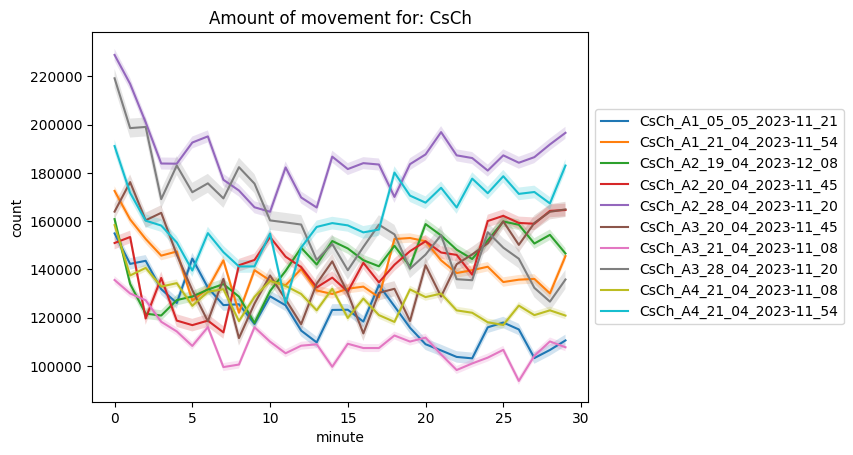

In [6]:
import os
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from src import settings
from src.utils import fileio, graph_utils

TREATMENT = "CsCh"

INPUT_DIR = SCRIPT_OUTPUT = os.path.join(
    settings.RESULTS_DIR,TREATMENT, "distances_traveled"
)
distances = fileio.load_files_from_folder(INPUT_DIR, ".csv", n_sort=True)

for group_name, group_path in distances.items():
    df = pd.read_csv(group_path, index_col=0)
    df_grouped = df.groupby(df.index // 1440).sum()
    df_grouped['total_movement'] = df_grouped.sum(axis=1)
    sem = np.std(df_grouped['total_movement']) / np.sqrt(len(df_grouped['total_movement']))
    group_name_without_ext = group_name.split('.')[0]

    plt.plot(df_grouped.index, df_grouped['total_movement'], label=group_name_without_ext)
    plt.fill_between(df_grouped.index, df_grouped['total_movement']-sem, df_grouped['total_movement']+sem, alpha=0.2)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title(f"Amount of movement for: {TREATMENT}")
plt.xlabel("minute")
plt.ylabel("count")
plt.show()